In [422]:
import pandas as pd
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.svm import SVR
dataframe = pd.read_csv('googleplaystore.csv')
dataframe.head(5)

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [423]:
#only for numeric columns
dataframe.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [424]:
#print("Minimum rating",dataframe['Rating'].min())
print("Different values for the category:\n ",dataframe['Category'].value_counts())

Different values for the category:
  FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64


In [425]:
print("Different values for the genres:\n ",dataframe['Genres'].value_counts())

Different values for the genres:
  Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Strategy;Education          1
Lifestyle;Education         1
Lifestyle;Pretend Play      1
Tools;Education             1
Trivia;Education            1
Name: Genres, Length: 119, dtype: int64


In [426]:
print("Different values for the content rating:\n ",dataframe['Content Rating'].value_counts())

Different values for the content rating:
  Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64


In [427]:
#Brisanje kolona Type i Genres
dataframe.drop(['Type'], axis=1,inplace=True)
dataframe.drop(['Genres'], axis=1,inplace=True)

In [428]:
#Uklanjanje $ ispred cene
dataframe['Price'] = dataframe['Price'].replace('[\$,]', '', regex=True).astype(float)
#print("Different values for the price:\n ",dataframe['Price'].value_counts())

In [429]:
#Uklanjanje + iza broja instalacija
dataframe['Installs'] = dataframe['Installs'].replace('[,\+]', '', regex=True).astype(int)
#print("Different values for the installs:\n ",dataframe['Installs'].value_counts())

In [430]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9366 non-null   float64
 1   App             10840 non-null  object 
 2   Category        10840 non-null  object 
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int32  
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
 8   Last Updated    10840 non-null  object 
 9   Current Ver     10832 non-null  object 
 10  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(7)
memory usage: 889.3+ KB


In [431]:
dataframe.isnull().sum()

Rating            1474
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [432]:
#moramo da vidimo sta cemo sa ovom velikom kolicinom redova gde je 
#rating NaN...
#jedna od opcija je da uzmemo srednju vrednost svih ratinga, pa da nam
#to bude vrednost koju cemo da koristimo
#a mozda i nema veze, jer je to otprilike samo desetina redova
dataframe = dataframe.dropna()

In [433]:
dataframe.count()

Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Price             9360
Content Rating    9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [434]:
import numpy as np
from sklearn import preprocessing

#Rescaling function 0-1
def rescaling(dfColumn):
    # Create feature
    feature = dfColumn.to_numpy().reshape(-1, 1)
    #Create scaler
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    # Scale feature
    scaled_feature = minmax_scale.fit_transform(feature)
    return pd.Series(scaled_feature.reshape(-1), index=dataframe.index)


#F-ja vraca niz brojeva iz niza stringova
def strToNum(column, valueForVary):
    arr = []
    for r in column:
        value = 0
        if(r[0].isdigit()):
            s = str(int(''.join(filter(str.isdigit, r))))
            value = float(s[:1] + "." + s[1:])
        else:
            value = valueForVary
        arr.append(value)
    return pd.DataFrame(np.array(arr), index=dataframe.index)


def columnSize(column):
    arr = []
    count = 0
    sum = 0
    for r in column:
        value = 0
        n=len(r)
        if(r[n-1]=='k'): 
            value = float(r[:n-1])*0.001 #1KB = 0.001MB 
            sum += value
            count +=1
        elif r[n-1]=='M':
            value = float(r[:n-1]) 
            sum += value
            count += 1
        else:
            value = -10
        arr.append(value)
    return (pd.DataFrame(np.array(arr), index=dataframe.index), sum/count)

def toOrdinalDate(column):
    arr=[]
    for date in column:
        time=pd.Timestamp(date)
        time=time.toordinal()
        arr.append(time)
    return pd.DataFrame(np.array(arr), index=dataframe.index)

In [435]:
#Sredjivanje podataka, dodeljivanje brojcanih vrednosti
s = str(int(''.join(filter(str.isdigit,dataframe['Android Ver'].value_counts().index[0]))))
valueAndroid = float(s[:1]+ "."+s[1:])
s = str(int(''.join(filter(str.isdigit,dataframe['Current Ver'].value_counts().index[1]))))
valueCurrent = float(s[:1]+ "."+s[1:])

dataframe['Android Ver'] = strToNum(dataframe['Android Ver'].to_numpy(),valueAndroid)
dataframe['Current Ver'] = strToNum(dataframe['Current Ver'].to_numpy(),valueCurrent)
dataframe['Size'],mean = columnSize(dataframe['Size'].to_numpy())
dataframe['Size'] = dataframe['Size'].replace(-10, mean)
dataframe['Last Updated'] = toOrdinalDate(dataframe['Last Updated'].to_numpy())

#Rescaling 
dataframe['Reviews'] = rescaling(dataframe['Reviews'])
dataframe['Rating'] = rescaling(dataframe['Rating'])
dataframe['Installs'] = rescaling(dataframe['Installs'])
dataframe['Price'] = rescaling(dataframe['Price'])
dataframe['Size'] = rescaling(dataframe['Size']) 
dataframe['Last Updated'] = rescaling(dataframe['Last Updated'])

In [436]:
#### https://www.kaggle.com/madhav000/playstore-analysis

In [437]:
#Encoding Nominal Categorical Features (App, Genres, Category)
#dataframe = pd.concat([dataframe,pd.get_dummies(dataframe['Category'], prefix='Category')],axis=1)
#dataframe.drop(['Category'],axis=1, inplace=True)

In [438]:
#Encoding Ordinal Categorical Features
cont_rating_mapper = {"Unrated":1, "Everyone":1, "Everyone 10+":2, "Teen":3, "Mature 17+":4, "Adults only 18+":5}
dataframe['Content Rating'] = dataframe['Content Rating'].replace(cont_rating_mapper)
#Rescaling
dataframe['Content Rating'] = rescaling(dataframe['Content Rating'])

category_mapper=dataframe['Category'].value_counts().to_dict()
dataframe['Category'] = dataframe['Category'].replace(category_mapper)
#Rescaling
dataframe['Category'] = rescaling(dataframe['Category'])

In [439]:
dataframe = dataframe.set_index(dataframe['App'])
dataframe.drop(['App'],axis=1,inplace=True)
dataframe.head()

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,0.775,0.01115,0.000002,0.189931,0.00001,0.0,0.0,0.929024,1.00,4.03
Coloring book moana,0.725,0.01115,0.000012,0.139927,0.00050,0.0,0.0,0.931689,2.00,4.03
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",0.925,0.01115,0.001120,0.086922,0.00500,0.0,0.0,0.997667,1.24,4.03
Sketch - Draw & Paint,0.875,0.01115,0.002759,0.249936,0.05000,0.0,0.5,0.979673,1.00,4.20
Pixel Draw - Number Art Coloring Book,0.825,0.01115,0.000012,0.027917,0.00010,0.0,0.0,0.983672,1.10,4.40


In [440]:
dataframe.shape

(9360, 10)

In [441]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          9360 non-null   float64
 1   Category        9360 non-null   float64
 2   Reviews         9360 non-null   float64
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   float64
 5   Price           9360 non-null   float64
 6   Content Rating  9360 non-null   float64
 7   Last Updated    9360 non-null   float64
 8   Current Ver     9360 non-null   float64
 9   Android Ver     9360 non-null   float64
dtypes: float64(10)
memory usage: 804.4+ KB


In [442]:
#feature extraction using PCA
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
def pcaExtract(dataframe):
    mapper = DataFrameMapper([(dataframe.columns, StandardScaler())])
    scaled_features = mapper.fit_transform(dataframe.copy())
    pca = PCA(n_components=0.99, whiten=True) 
    pca_features = pca.fit_transform(scaled_features)
    print("Original number of features: ",scaled_features.shape[1])
    print("Reduced: ",pca_features.shape[1])
    return pd.DataFrame(pca_features, index=dataframe.index, columns=dataframe.columns)
def kernelPcaExtract(dataframe):
    #mapper = DataFrameMapper([(dataframe.columns, StandardScaler())])
    #scaled_features = mapper.fit_transform(dataframe.copy())
    kpca = KernelPCA(kernel="rbf", gamma=15, n_components=10)
    kpca_features = kpca.fit_transform(dataframe)
    return pd.DataFrame(kpca_features, index=dataframe.index, columns=dataframe.columns)
#ne radi lepo
def linDiscExtract(dataframe):
    lda = LinearDiscriminantAnalysis()
    y = dataframe['Rating'].astype('float64')
    dataframe.drop(['Rating'], axis=1,inplace=True)
    lda_features = lda.fit_transform(dataframe,y)
    return pd.DataFrame(lda_features, index=dataframe.index, columns=dataframe.columns)
def NMFExtract(dataframe):
    y = dataframe['Rating']
    dataframe.drop(['Rating'],axis=1,inplace=True)
    nmf = NMF(n_components=8, random_state=1, max_iter=10000)
    nmf_features = nmf.fit_transform(dataframe)
    df = pd.DataFrame(nmf_features, index=dataframe.index)
    df['Rating'] = y
    return df

In [443]:
#feature selection
#ovo samo vrati Android version i current version
def thresholdSelection(dataframe):
    y = dataframe['Rating']
    dataframe.drop(['Rating'],axis=1,inplace=True)
    thresholder = VarianceThreshold(threshold=.5)
    high_var = thresholder.fit_transform(dataframe)
    df = pd.DataFrame(high_var, index=dataframe.index)
    df['Rating'] = y
    return df
#vraca koje feature bi trebalo da zadrzimo
def rfecvSelection(dataframe):
    estimator = SVR(kernel="linear")
    rfecv = RFECV(estimator=estimator, step=1,scoring="neg_mean_squared_error")
    y = dataframe['Rating']
    dataframe.drop(['Rating'],axis=1,inplace=True)
    rfecv.fit(dataframe,y)
    rfecv.transform(dataframe)
    print(rfecv.n_features_)
    print(rfecv.support_)
    print(rfecv.ranking_)
rfecvSelection(dataframe)
dataframe.info()

5
[ True  True False  True  True False  True False False]
[1 1 5 1 1 2 1 4 3]
<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   float64
 1   Reviews         9360 non-null   float64
 2   Size            9360 non-null   float64
 3   Installs        9360 non-null   float64
 4   Price           9360 non-null   float64
 5   Content Rating  9360 non-null   float64
 6   Last Updated    9360 non-null   float64
 7   Current Ver     9360 non-null   float64
 8   Android Ver     9360 non-null   float64
dtypes: float64(9)
memory usage: 731.2+ KB


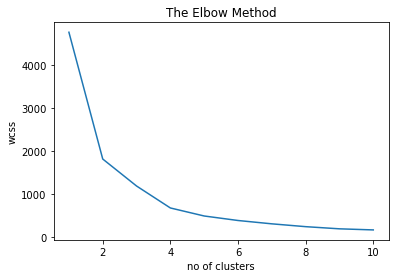

In [444]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

dataframe = dataframe.head(7000)
#dataframe = dataframe.drop(['Rating'], axis=1)
x = dataframe.iloc[:,[0,8]].values

##### The Elbow Method #####

score = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(x)
    score.append(kmeans.inertia_)
    
# plotting the score
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7259246422357519
For n_clusters = 3 The average silhouette_score is : 0.6609617831311776
For n_clusters = 4 The average silhouette_score is : 0.6768929983181536
For n_clusters = 5 The average silhouette_score is : 0.6880494990315091
For n_clusters = 6 The average silhouette_score is : 0.6667815986346013
For n_clusters = 7 The average silhouette_score is : 0.6853513723614478
For n_clusters = 8 The average silhouette_score is : 0.656988175527095
For n_clusters = 9 The average silhouette_score is : 0.6797046757805358
For n_clusters = 10 The average silhouette_score is : 0.6818957095117847


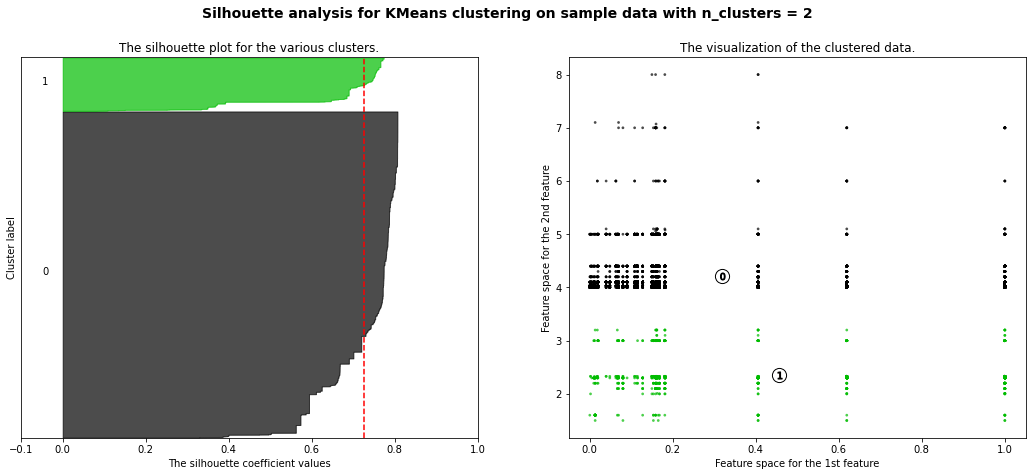

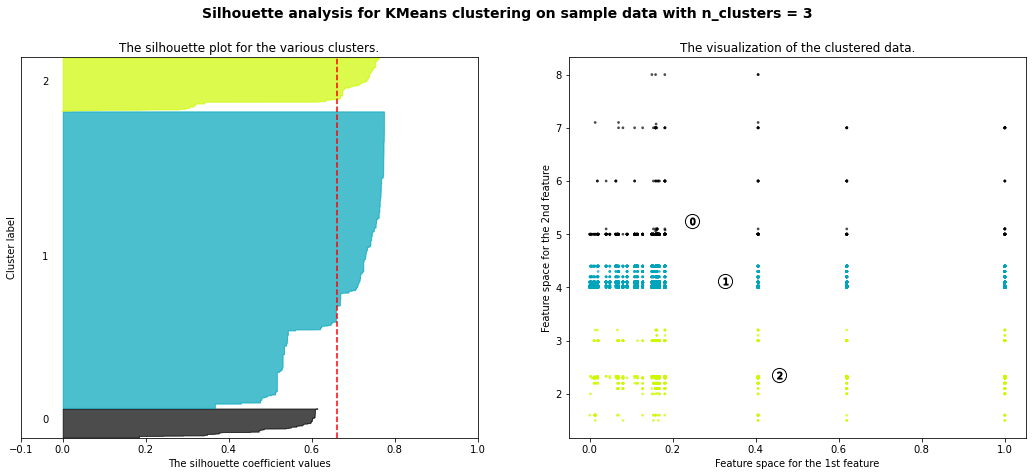

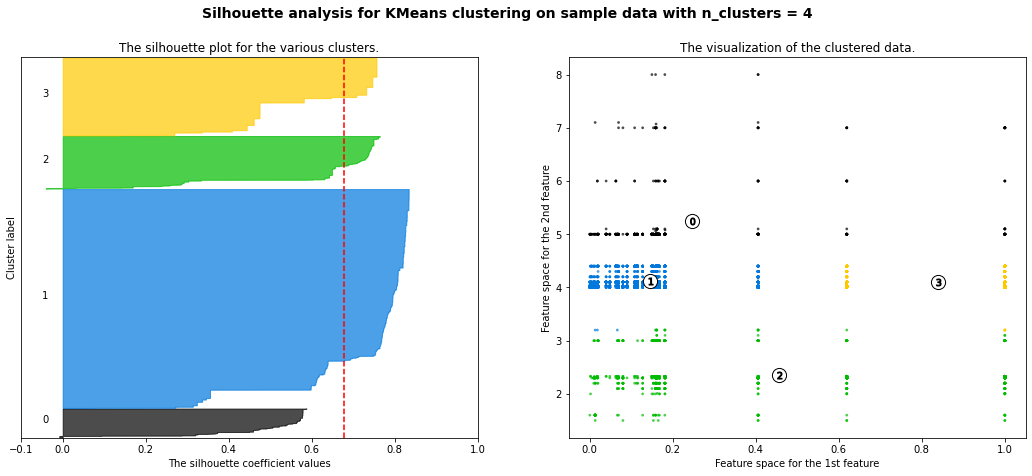

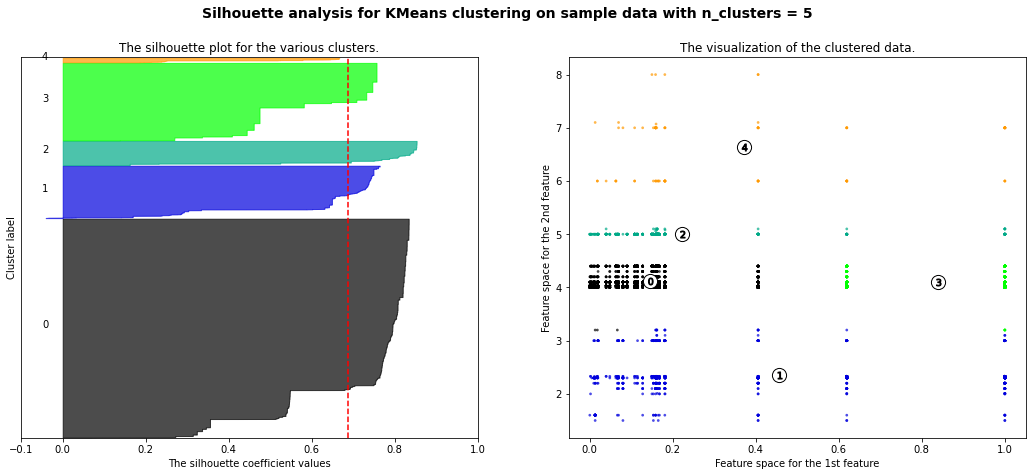

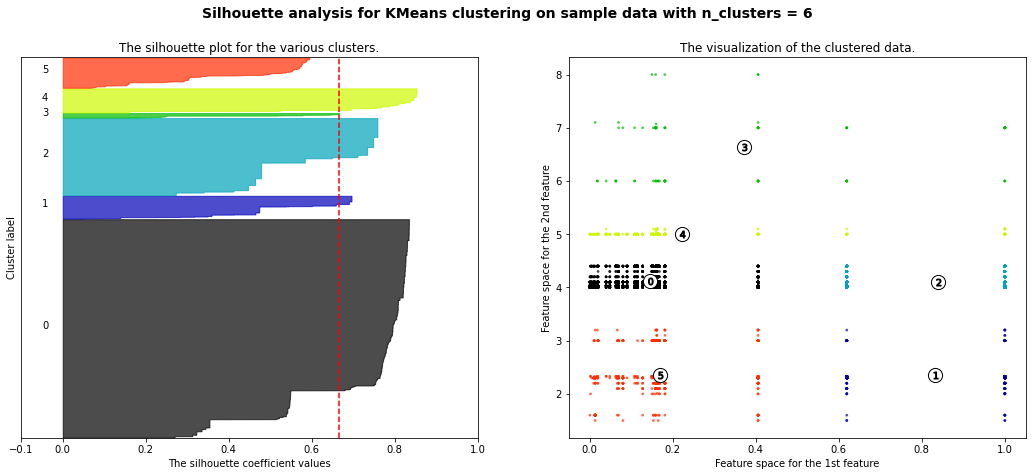

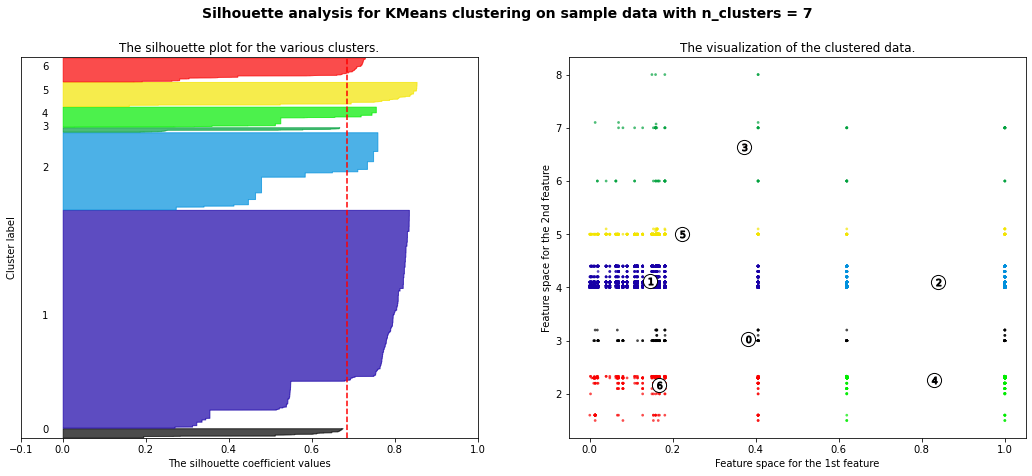

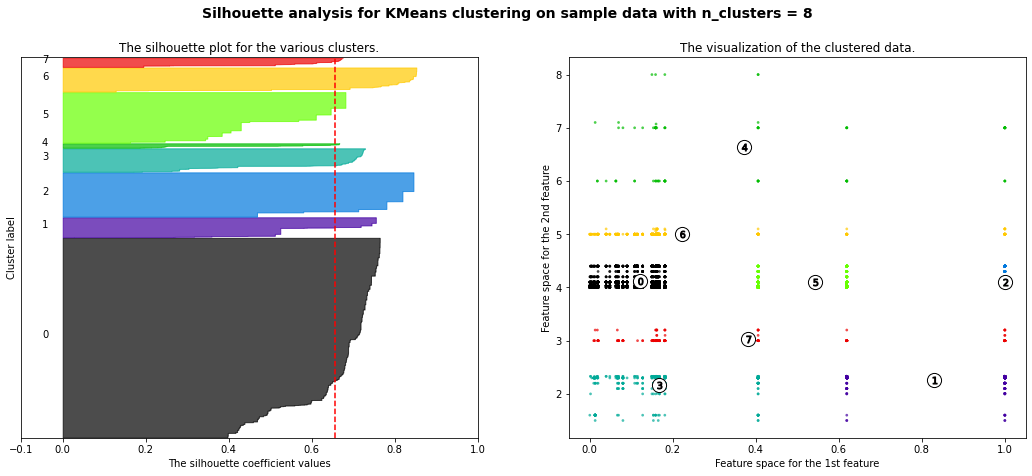

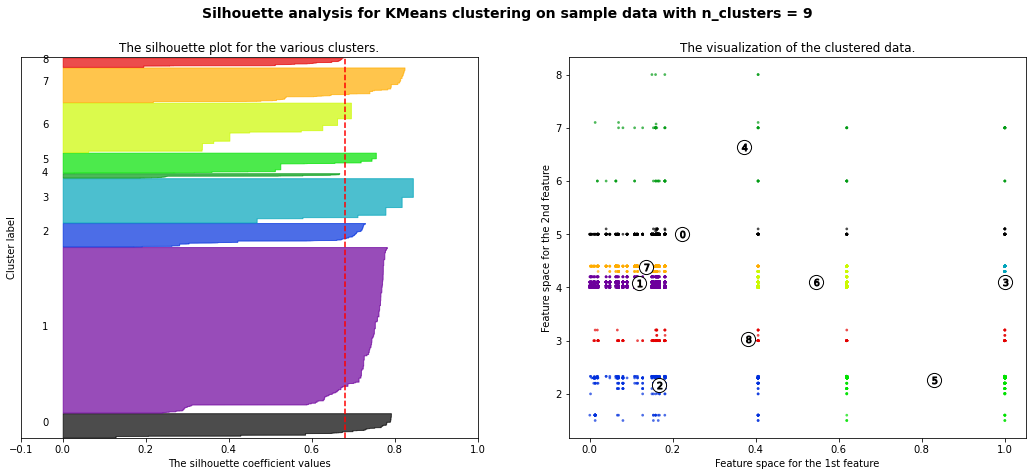

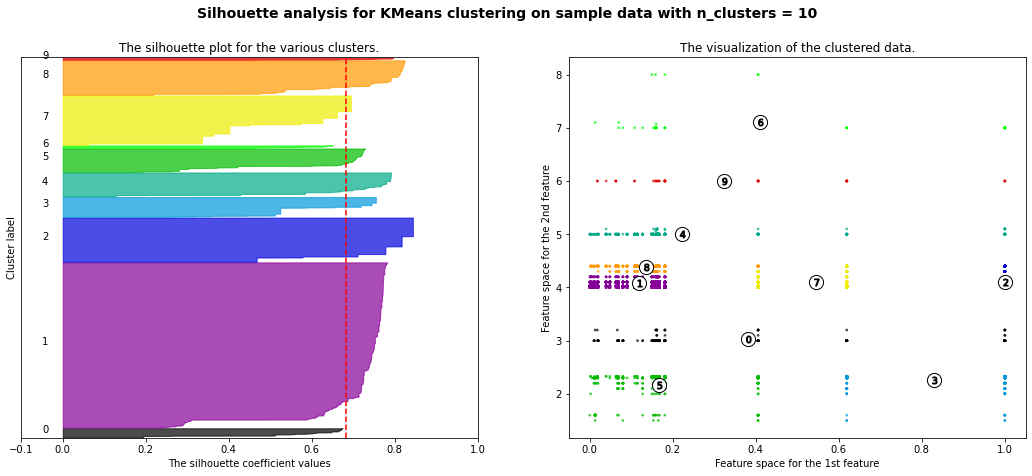

In [445]:
##### Silhouette score #####

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    f=0
    s=1

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, f], x[:, s], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, f], centers[:, s], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()